In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

<AxesSubplot:>

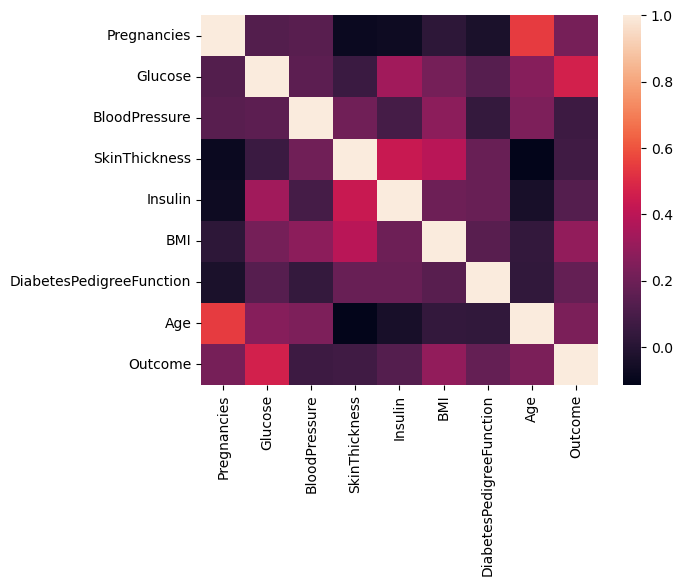

In [7]:
sns.heatmap(df.corr())

In [8]:
df.kurtosis()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [9]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
columns = df.columns

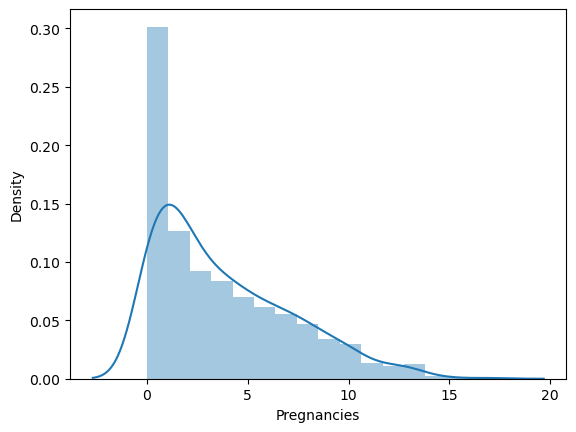

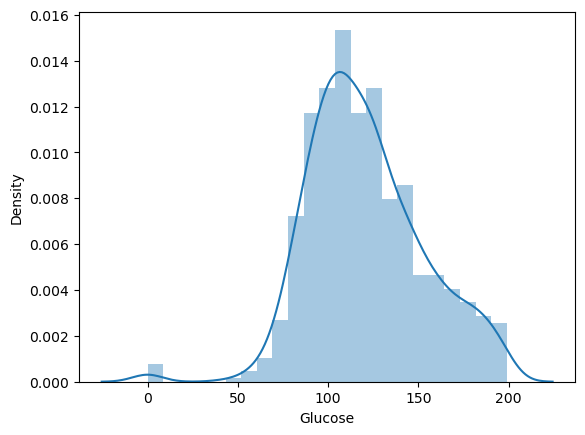

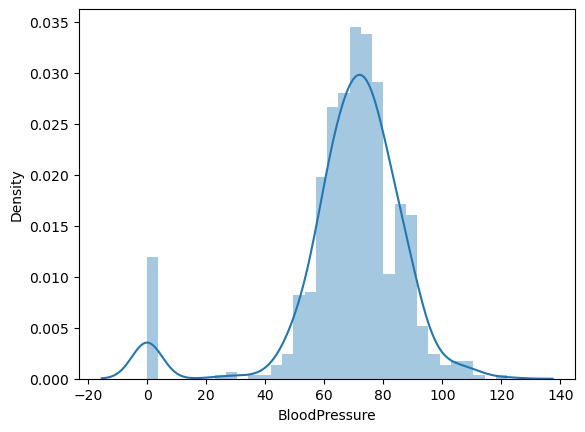

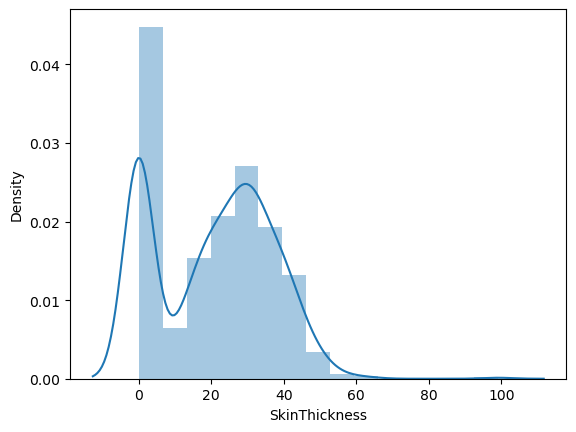

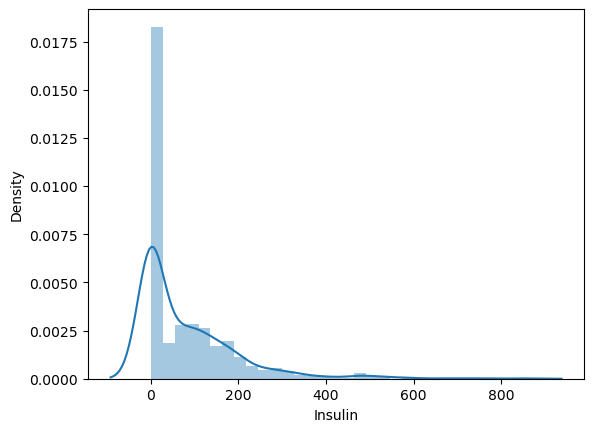

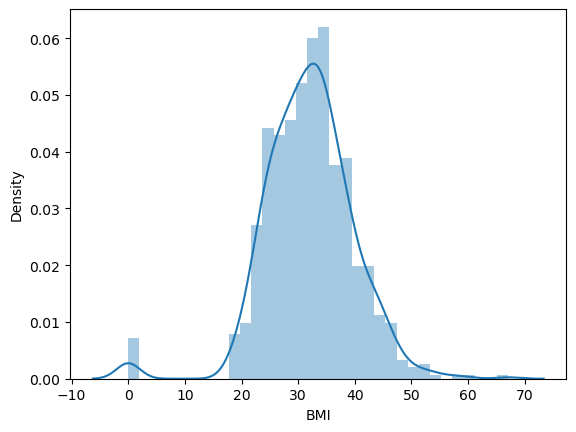

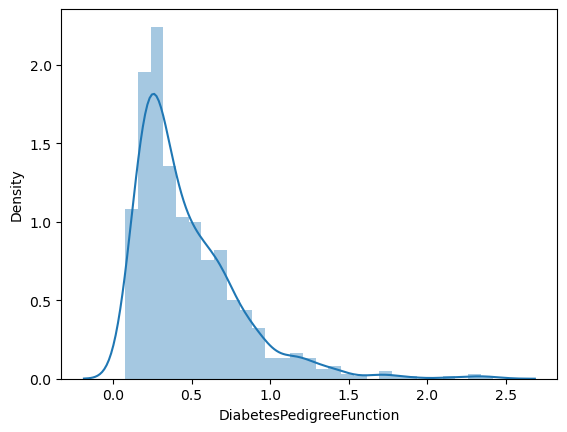

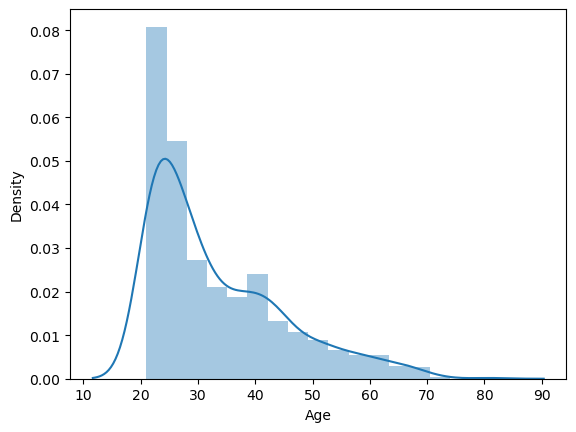

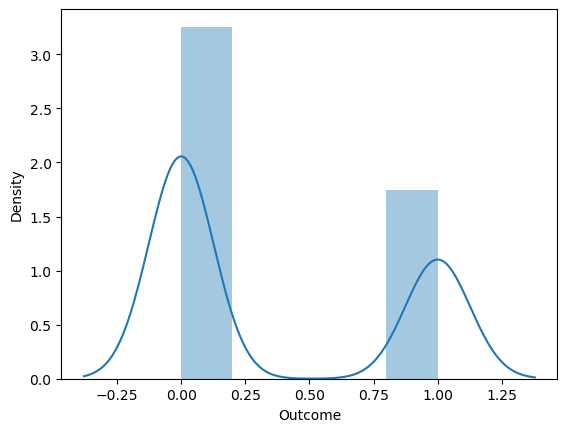

In [12]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

In [13]:
X = np.array(df.drop(["Outcome"], axis = 1))
y = np.array(df["Outcome"])
           

In [14]:
#Splitting the dataset into Training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state = 20)

In [19]:
#Single Layer Architecture
model = Sequential()
model.add(Dense(32, input_shape = (X_train.shape[1],)))
model.add(Activation("relu"))
model.add(Dense(64, input_shape = (X_train.shape[1],)))
model.add(Activation("relu"))
model.add(Dense(128, input_shape = (X_train.shape[1],)))
model.add(Activation("relu"))
model.add(Dense(256, input_shape = (X_train.shape[1],)))
model.add(Activation("relu"))
model.add(Dense(256, input_shape = (X_train.shape[1],)))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("softmax"))

In [20]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                288       
                                                                 
 activation_6 (Activation)   (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)              

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
               optimizer = "adagrad", metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, batch_size=300,epochs = 500, verbose = 1, validation_data=(X_test, Y_test))

Epoch 1/500
3/3 [==============================] - 1s 172ms/step - loss: 2.7201 - accuracy: 0.5130 - val_loss: 1.7252 - val_accuracy: 0.6558
Epoch 2/500
3/3 [==============================] - 0s 28ms/step - loss: 1.2961 - accuracy: 0.5635 - val_loss: 0.7776 - val_accuracy: 0.4610
Epoch 3/500
3/3 [==============================] - 0s 27ms/step - loss: 0.7067 - accuracy: 0.6156 - val_loss: 0.7320 - val_accuracy: 0.5455
Epoch 4/500
3/3 [==============================] - 0s 28ms/step - loss: 0.6972 - accuracy: 0.6515 - val_loss: 0.7256 - val_accuracy: 0.5649
Epoch 5/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6566 - accuracy: 0.6482 - val_loss: 0.7999 - val_accuracy: 0.6299
Epoch 6/500
3/3 [==============================] - 0s 28ms/step - loss: 0.9874 - accuracy: 0.4723 - val_loss: 0.7007 - val_accuracy: 0.6104
Epoch 7/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6389 - accuracy: 0.6857 - val_loss: 0.9558 - val_accuracy: 0.6299
Epoch 8/500
3/3 [==

3/3 [==============================] - 0s 27ms/step - loss: 0.5503 - accuracy: 0.7199 - val_loss: 0.6685 - val_accuracy: 0.6688
Epoch 60/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5516 - accuracy: 0.7231 - val_loss: 0.7487 - val_accuracy: 0.6299
Epoch 61/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5834 - accuracy: 0.7036 - val_loss: 0.7697 - val_accuracy: 0.5844
Epoch 62/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6006 - accuracy: 0.6906 - val_loss: 0.8441 - val_accuracy: 0.5390
Epoch 63/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6266 - accuracy: 0.6678 - val_loss: 0.7577 - val_accuracy: 0.6169
Epoch 64/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5957 - accuracy: 0.7003 - val_loss: 0.6861 - val_accuracy: 0.6299
Epoch 65/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5560 - accuracy: 0.7313 - val_loss: 0.6713 - val_accuracy: 0.6688
Epoch 66/500
3/3 [========

3/3 [==============================] - 0s 28ms/step - loss: 0.5680 - accuracy: 0.7036 - val_loss: 0.7380 - val_accuracy: 0.6104
Epoch 118/500
3/3 [==============================] - 0s 28ms/step - loss: 0.5562 - accuracy: 0.7117 - val_loss: 0.6609 - val_accuracy: 0.6558
Epoch 119/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5296 - accuracy: 0.7296 - val_loss: 0.6724 - val_accuracy: 0.6688
Epoch 120/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5327 - accuracy: 0.7345 - val_loss: 0.6669 - val_accuracy: 0.6494
Epoch 121/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5295 - accuracy: 0.7296 - val_loss: 0.6648 - val_accuracy: 0.6299
Epoch 122/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5256 - accuracy: 0.7378 - val_loss: 0.6700 - val_accuracy: 0.6429
Epoch 123/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5244 - accuracy: 0.7459 - val_loss: 0.7755 - val_accuracy: 0.5779
Epoch 124/500
3/3 [=

Epoch 175/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5165 - accuracy: 0.7443 - val_loss: 0.6744 - val_accuracy: 0.6688
Epoch 176/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5205 - accuracy: 0.7280 - val_loss: 0.6632 - val_accuracy: 0.6494
Epoch 177/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5215 - accuracy: 0.7476 - val_loss: 0.6866 - val_accuracy: 0.6299
Epoch 178/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5285 - accuracy: 0.7264 - val_loss: 0.6611 - val_accuracy: 0.6234
Epoch 179/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5156 - accuracy: 0.7590 - val_loss: 0.6779 - val_accuracy: 0.6558
Epoch 180/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5263 - accuracy: 0.7313 - val_loss: 0.7197 - val_accuracy: 0.6299
Epoch 181/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5382 - accuracy: 0.7215 - val_loss: 0.6900 - val_accuracy: 0.6104
Epoch 

Epoch 233/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5121 - accuracy: 0.7557 - val_loss: 0.6580 - val_accuracy: 0.6364
Epoch 234/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5193 - accuracy: 0.7394 - val_loss: 0.6497 - val_accuracy: 0.6429
Epoch 235/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5104 - accuracy: 0.7541 - val_loss: 0.6895 - val_accuracy: 0.6039
Epoch 236/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5254 - accuracy: 0.7345 - val_loss: 0.6681 - val_accuracy: 0.6299
Epoch 237/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5156 - accuracy: 0.7427 - val_loss: 0.6472 - val_accuracy: 0.6558
Epoch 238/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5066 - accuracy: 0.7622 - val_loss: 0.7092 - val_accuracy: 0.5974
Epoch 239/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5394 - accuracy: 0.7296 - val_loss: 0.6560 - val_accuracy: 0.6558
Epoch 

Epoch 291/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5073 - accuracy: 0.7264 - val_loss: 0.6835 - val_accuracy: 0.6429
Epoch 292/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5100 - accuracy: 0.7329 - val_loss: 0.7117 - val_accuracy: 0.6104
Epoch 293/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5278 - accuracy: 0.7345 - val_loss: 0.7324 - val_accuracy: 0.6558
Epoch 294/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5459 - accuracy: 0.7329 - val_loss: 0.6715 - val_accuracy: 0.6623
Epoch 295/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5045 - accuracy: 0.7410 - val_loss: 0.6778 - val_accuracy: 0.6299
Epoch 296/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5089 - accuracy: 0.7459 - val_loss: 0.6610 - val_accuracy: 0.6558
Epoch 297/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5026 - accuracy: 0.7508 - val_loss: 0.7013 - val_accuracy: 0.6558
Epoch 

Epoch 349/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5055 - accuracy: 0.7476 - val_loss: 0.6855 - val_accuracy: 0.6169
Epoch 350/500
3/3 [==============================] - 0s 28ms/step - loss: 0.5076 - accuracy: 0.7541 - val_loss: 0.6833 - val_accuracy: 0.6429
Epoch 351/500
3/3 [==============================] - 0s 24ms/step - loss: 0.5102 - accuracy: 0.7508 - val_loss: 0.6756 - val_accuracy: 0.6558
Epoch 352/500
3/3 [==============================] - 0s 27ms/step - loss: 0.4985 - accuracy: 0.7524 - val_loss: 0.6800 - val_accuracy: 0.6494
Epoch 353/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5066 - accuracy: 0.7427 - val_loss: 0.6970 - val_accuracy: 0.6494
Epoch 354/500
3/3 [==============================] - 0s 28ms/step - loss: 0.5180 - accuracy: 0.7345 - val_loss: 0.6661 - val_accuracy: 0.6688
Epoch 355/500
3/3 [==============================] - 0s 25ms/step - loss: 0.5020 - accuracy: 0.7443 - val_loss: 0.6619 - val_accuracy: 0.6753
Epoch 

Epoch 407/500
3/3 [==============================] - 0s 27ms/step - loss: 0.4943 - accuracy: 0.7557 - val_loss: 0.6749 - val_accuracy: 0.6364
Epoch 408/500
3/3 [==============================] - 0s 26ms/step - loss: 0.4963 - accuracy: 0.7508 - val_loss: 0.6612 - val_accuracy: 0.6688
Epoch 409/500
3/3 [==============================] - 0s 27ms/step - loss: 0.4959 - accuracy: 0.7638 - val_loss: 0.6649 - val_accuracy: 0.6494
Epoch 410/500
3/3 [==============================] - 0s 26ms/step - loss: 0.4956 - accuracy: 0.7687 - val_loss: 0.6657 - val_accuracy: 0.6623
Epoch 411/500
3/3 [==============================] - 0s 27ms/step - loss: 0.4956 - accuracy: 0.7622 - val_loss: 0.6769 - val_accuracy: 0.6753
Epoch 412/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5046 - accuracy: 0.7427 - val_loss: 0.7167 - val_accuracy: 0.5974
Epoch 413/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5231 - accuracy: 0.7410 - val_loss: 0.6916 - val_accuracy: 0.6234
Epoch 

Epoch 465/500
3/3 [==============================] - 0s 27ms/step - loss: 0.4929 - accuracy: 0.7541 - val_loss: 0.6884 - val_accuracy: 0.6104
Epoch 466/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5067 - accuracy: 0.7508 - val_loss: 0.6720 - val_accuracy: 0.6558
Epoch 467/500
3/3 [==============================] - 0s 26ms/step - loss: 0.4920 - accuracy: 0.7655 - val_loss: 0.6955 - val_accuracy: 0.6234
Epoch 468/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5054 - accuracy: 0.7508 - val_loss: 0.6916 - val_accuracy: 0.6494
Epoch 469/500
3/3 [==============================] - 0s 26ms/step - loss: 0.4960 - accuracy: 0.7459 - val_loss: 0.6753 - val_accuracy: 0.6688
Epoch 470/500
3/3 [==============================] - 0s 26ms/step - loss: 0.5020 - accuracy: 0.7476 - val_loss: 0.6747 - val_accuracy: 0.6429
Epoch 471/500
3/3 [==============================] - 0s 25ms/step - loss: 0.4926 - accuracy: 0.7671 - val_loss: 0.6705 - val_accuracy: 0.6623
Epoch 

In [23]:
loss, accuracy = model.evaluate(X_test, Y_test,verbose = 1)

5/5 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6688


In [24]:
print("Loss : "+str(loss))

Loss : 0.6609492301940918


In [25]:
print("Accuracy: "+str(accuracy*100.0))

Accuracy: 66.88311696052551
